In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import RandomizedSearchCV,  GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

In [2]:
X = pd.read_csv('ppiemb.csv') # feature array
X.head()


,Protein_ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_119,Feature_120,Feature_121,Feature_122,Feature_123,Feature_124,Feature_125,Feature_126,Feature_127,Feature_128
0,33604,-0.510713,-0.034698,0.226693,-0.104328,-0.538392,-0.507054,0.492950,-1.00316,0.028777,...,0.089326,0.051028,0.111069,0.001206,0.026827,-0.177385,0.000920,0.091404,0.057852,0.037080
1,32517,-0.491558,-0.046047,0.257778,-0.160126,-0.554985,-0.543983,0.572091,-1.18108,-0.016534,...,0.140605,0.056848,-0.025456,0.029715,0.044395,-0.051489,0.130238,0.117172,0.145234,-0.037787
2,33032,-0.185390,-0.045132,0.207800,-0.087014,-0.451806,-0.529272,0.541076,-1.15432,0.015249,...,-0.000517,0.003153,-0.055355,-0.023645,-0.044576,0.167176,-0.060008,-0.064866,-0.100815,-0.031260
3,32122,-0.419456,-0.043147,0.196954,-0.008683,-0.365592,-0.459568,0.522353,-1.08144,0.007236,...,-0.001924,0.036864,-0.023502,-0.012770,0.027593,-0.115401,0.006661,0.034642,-0.053900,-0.001947
4,31903,-0.270278,0.042724,0.222879,-0.087699,-0.453998,-0.456130,0.546997,-1.45105,0.066381,...,0.065648,-0.013739,-0.002602,-0.025708,0.006592,-0.025986,0.072824,0.108263,0.026072,0.053583


In [3]:
y = pd.read_csv('ppiemb_essentiality.csv') # target array
y.head()

,Essentiality
0,1
1,0
2,1
3,0
4,0


In [4]:
X.dtypes

Protein_ID       int64
Feature_1      float64
Feature_2      float64
Feature_3      float64
Feature_4      float64
                ...   
Feature_124    float64
Feature_125    float64
Feature_126    float64
Feature_127    float64
Feature_128    float64
Length: 129, dtype: object

In [5]:
y.dtypes

Essentiality    int64
dtype: object

In [6]:
sum(y['Essentiality'])/len(y['Essentiality']) # to see the percentage of the essential genes in y.

0.152945979044768

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
# test_size = 0.25, train_size = 0.75

In [8]:
sum(y_train['Essentiality'])/len(y_train['Essentiality']) # check to see if the percentage of essential genes in training set is the same with y. 

0.15296679368535657

In [9]:
sum(y_test['Essentiality'])/len(y_test['Essentiality']) # check to see if the percentage of essential genes in testing set is the same with y. 

0.1528835690968444

[02:20:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8069446444366732


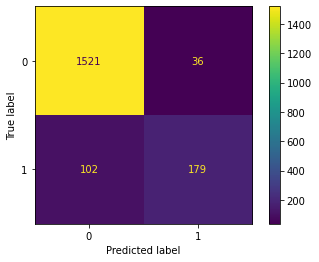

In [12]:
# plot_confusion_matrix(clf_xgb,
#                      X_test,
#                      y_test)
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, seed=42)

xgb_clf.fit(X_train, y_train)

predictions = xgb_clf.predict(X_test)
print(balanced_accuracy_score(y_test, predictions))

c_matrix = confusion_matrix(y_test, predictions, labels=xgb_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix,
                              display_labels=xgb_clf.classes_)
disp.plot()
plt.show()

## Hyperparameter Optimization (WIP)

## GridSearchCV()

In [14]:
#GridSearchCV()

## Round 1
    # param_grid = {
    #     'max_depth': [3,4,5], # possible tree levels
    #     'learning_rate': [0.1, 0.01, 0.05],
    #     'gamma': [0, 0.25, 1.0],
    #     'reg_lambda': [0, 1.0, 10.0],
    #     'scale_pos_weight': [1, 3, 5]
    # }

## Results of Round 1
    # XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
    #               colsample_bynode=1, colsample_bytree=0.5,
    #               enable_categorical=False, gamma=1.0, gpu_id=-1,
    #               importance_type=None, interaction_constraints='',
    #               learning_rate=0.1, max_delta_step=0, max_depth=5,
    #               min_child_weight=1, missing=nan, monotone_constraints='()',
    #               n_estimators=100, n_jobs=12, num_parallel_tree=1,
    #               predictor='auto', random_state=42, reg_alpha=0, reg_lambda=10.0,
    #               scale_pos_weight=1, seed=42, subsample=0.9, tree_method='exact',
    #               validate_parameters=1, verbosity=None)
    # {'gamma': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 10.0, 'scale_pos_weight': 1}

## Round 2
    # param_grid = {
    #     'max_depth': [5, 6, 7],
    #     'learning_rate': [0.2, 0.15, 0.1],
    #     'gamma': [1.0, 2.0, 3.0, 4.0],
    #     'reg_lambda': [10.0, 20.0, 100.0],
    #     'scale_pos_weight': [1]
    #}
    
## Results of Round 2
   # XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
   #            colsample_bynode=1, colsample_bytree=0.5,
   #            enable_categorical=False, gamma=2.0, gpu_id=-1,
   #            importance_type=None, interaction_constraints='',
   #            learning_rate=0.15, max_delta_step=0, max_depth=7,
   #            min_child_weight=1, missing=nan, monotone_constraints='()',
   #            n_estimators=100, n_jobs=12, num_parallel_tree=1,
   #            predictor='auto', random_state=42, reg_alpha=0, reg_lambda=20.0,
   #            scale_pos_weight=1, seed=42, subsample=0.9, tree_method='exact',
   #            validate_parameters=1, verbosity=None)
   #  {'gamma': 2.0, 'learning_rate': 0.15, 'max_depth': 7, 'reg_lambda': 20.0, 'scale_pos_weight': 1}

## Round 3
# param_grid= {     
#      'learning_rate'    : [0.15] ,
#      'max_depth'        : [7, 10, 13],
#      'min_child_weight' : [1, 3, 5],
#      'gamma'            : [1.0],
#      'reg_lambda'       : [20.0, 40.0, 60.0],
#      'scale_pos_weight' : [1]
# }

## Results of Round 3
    # XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
    #               colsample_bynode=1, colsample_bytree=0.5,
    #               enable_categorical=False, gamma=1.0, gpu_id=-1,
    #               importance_type=None, interaction_constraints='',
    #               learning_rate=0.15, max_delta_step=0, max_depth=7,
    #               min_child_weight=5, missing=nan, monotone_constraints='()',
    #               n_estimators=100, n_jobs=12, num_parallel_tree=1,
    #               predictor='auto', random_state=42, reg_alpha=0, reg_lambda=40.0,
    #               scale_pos_weight=1, seed=42, subsample=0.9, tree_method='exact',
    #               validate_parameters=1, verbosity=None)
    # {'gamma': 1.0, 'learning_rate': 0.15, 'max_depth': 7, 'min_child_weight': 5, 'reg_lambda': 40.0, 'scale_pos_weight': 1}
    
##Round 4

param_grid = {
          'max_depth': [7, 9, 11, 13, 15],
          'learning_rate': [0.15],
          'gamma': [2.0],
          'reg_lambda': [20.0, 40.0, 60.0],
          'scale_pos_weight': [1]
     }

## Results of Round 4
    # XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
    #               colsample_bynode=1, colsample_bytree=0.5,
    #               enable_categorical=False, gamma=2.0, gpu_id=-1,
    #               importance_type=None, interaction_constraints='',
    #               learning_rate=0.15, max_delta_step=0, max_depth=7,
    #               min_child_weight=1, missing=nan, monotone_constraints='()',
    #               n_estimators=100, n_jobs=12, num_parallel_tree=1,
    #               predictor='auto', random_state=42, reg_alpha=0, reg_lambda=20.0,
    #               scale_pos_weight=1, seed=42, subsample=0.9, tree_method='exact',
    #               validate_parameters=1, verbosity=None)
    # {'gamma': 2.0, 'learning_rate': 0.15, 'max_depth': 7, 'reg_lambda': 20.0, 'scale_pos_weight': 1}

## when working with imbalanced data:
## balance the positive and negative weights with scale_pos_weight
## use AUC for evaluation

## to prevent overfitting and to speed up the process, 
## set subsample = 0.9,
## set colsample_bytree = 0.5 so that a random subset (50%) of columns are used
## cv = 3, three-fold cross-validation

optimal_parameters = GridSearchCV(estimator = xgb.XGBClassifier(objective='binary:logistic',
                                                              seed=42,
                                                              subsample=0.9,
                                                              colsample_bytree=0.5
                                                               ),
                                 param_grid = param_grid,
                                 scoring = 'roc_auc',
                                 verbose = 2,
                                 n_jobs = 10,
                                 cv = 3)

optimal_parameters.fit(X_train,
                       y_train,
                       early_stopping_rounds=10,
                       eval_metric='auc',
                       eval_set=[(X_test, y_test)],
                       verbose=True)


# classifier=xgb.XGBClassifier()
# random_search = RandomizedSearchCV(classifier, param_distributions=param_grid, n_iter=5, scoring='roc_auc', n_jobs=-1, cv=5, verbose=3)


# random_search.fit(X_train,y_train)

print(optimal_parameters.best_estimator_)
print(optimal_parameters.best_params_)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[0]	validation_0-auc:0.81642
[1]	validation_0-auc:0.85419
[2]	validation_0-auc:0.86285
[3]	validation_0-auc:0.86389
[4]	validation_0-auc:0.87276
[5]	validation_0-auc:0.87318
[6]	validation_0-auc:0.87795
[7]	validation_0-auc:0.88335
[8]	validation_0-auc:0.88552


C:\Users\Burcu\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Burcu\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Burcu\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

[9]	validation_0-auc:0.88725
[10]	validation_0-auc:0.88738
[11]	validation_0-auc:0.88780
[12]	validation_0-auc:0.89002
[13]	validation_0-auc:0.89354
[14]	validation_0-auc:0.89591
[15]	validation_0-auc:0.89707
[16]	validation_0-auc:0.89743
[17]	validation_0-auc:0.89796
[18]	validation_0-auc:0.89975
[19]	validation_0-auc:0.89986
[20]	validation_0-auc:0.90047
[21]	validation_0-auc:0.90058
[22]	validation_0-auc:0.90120
[23]	validation_0-auc:0.90085
[24]	validation_0-auc:0.90170
[25]	validation_0-auc:0.90275
[26]	validation_0-auc:0.90340
[27]	validation_0-auc:0.90444
[28]	validation_0-auc:0.90346
[29]	validation_0-auc:0.90440
[30]	validation_0-auc:0.90468
[31]	validation_0-auc:0.90548
[32]	validation_0-auc:0.90598
[33]	validation_0-auc:0.90693
[34]	validation_0-auc:0.90803
[35]	validation_0-auc:0.90819
[36]	validation_0-auc:0.90770
[37]	validation_0-auc:0.90819
[38]	validation_0-auc:0.90838
[39]	validation_0-auc:0.90814
[40]	validation_0-auc:0.90794
[41]	validation_0-auc:0.90794
[42]	valida

In [15]:
# With GridSearchCV
# {'gamma': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 10.0, 'scale_pos_weight': 1} -> 0.7999746295572515

# {'gamma': 2.0, 'learning_rate': 0.15, 'max_depth': 7, 'reg_lambda': 20.0, 'scale_pos_weight': 1} -> 0.790582994489357
clf_grid = xgb.XGBClassifier(seed=42,
                            objective='binary:logistic',
                            gamma=1.0,
                            learn_rate=0.15,
                            max_depth=7,
                            reg_lambda=20.0,
                            scale_pos_weight=1,
                            subsample=0.9,
                            colsample_bytree=0.5,
                            n_estimators=100)


clf_grid.fit(X_train, 
            y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test, y_test)])

[02:23:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "learn_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-aucpr:0.55546
[1]	validation_0-aucpr:0.65993
[2]	validation_0-aucpr:0.68089
[3]	validation_0-aucpr:0.69059
[4]	validation_0-aucpr:0.69805
[5]	validation_0-aucpr:0.70098
[6]	validation_0-aucpr:0.71153
[7]	validation_0-aucpr:0.72651
[8]	validation_0-aucpr:0.72654
[9]	validation_0-aucpr:0.73193
[10]	validation_0-aucpr:0.73504
[11]	validation_0-aucpr:0.73882
[12]	validation_0-aucpr:0.74325
[13]	validation_0-aucpr:0.74735
[14]	validation_0-aucpr:0.74698
[15]	validation_0-aucpr:0.74709
[16]	validation_0-aucpr:0.75382
[17]	validation_0-aucpr:0.75516
[18]	validation

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=1.0, gpu_id=-1,
              importance_type=None, interaction_constraints='', learn_rate=0.15,
              learning_rate=0.300000012, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=42, reg_alpha=0, reg_lambda=20.0,
              scale_pos_weight=1, seed=42, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

0.7799331225986648


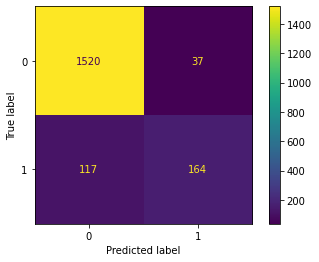

In [16]:
# with GridSearchCV, 0.7999746295572515 for
# {'gamma': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 10.0, 'scale_pos_weight': 1}
predictions = clf_grid.predict(X_test)
print(balanced_accuracy_score(y_test, predictions))

c_matrix = confusion_matrix(y_test, predictions, labels=clf_grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix,
                              display_labels=clf_grid.classes_)
disp.plot()
plt.show()

## RandomizedSearchCV()

In [17]:
#RandomizedSearchCV()

#Round 1
# param_grid = {
#     'max_depth': [3,4,5], # possible tree levels
#     'learning_rate': [0.1, 0.01, 0.05],
#     'gamma': [0, 0.25, 1.0],
#     'reg_lambda': [0, 1.0, 10.0],
#     'scale_pos_weight': [1, 3, 5]
# }

# XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
#               gamma=0.25, gpu_id=-1, importance_type=None,
#               interaction_constraints='', learning_rate=0.1, max_delta_step=0,
#               max_depth=4, min_child_weight=1, missing=nan,
#               monotone_constraints='()', n_estimators=100, n_jobs=12,
#               num_parallel_tree=1, predictor='auto', random_state=0,
#               reg_alpha=0, reg_lambda=1.0, scale_pos_weight=5, subsample=1,
#               tree_method='exact', validate_parameters=1, verbosity=None)
# {'scale_pos_weight': 5, 'reg_lambda': 1.0, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.25}

## Round 2
param_grid = {
     'max_depth': [4],
     'learning_rate': [0.2, 0.05, 0.1],
     'gamma': [0.25],
     'reg_lambda': [1.0],
     'scale_pos_weight': [5, 6, 7]
} 

classifier=xgb.XGBClassifier()
#andom_search = RandomizedSearchCV(classifier, pram_distributions=param_grid,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search = RandomizedSearchCV(classifier, param_distributions=param_grid, n_iter=5, scoring='roc_auc', n_jobs=-1, cv = 5, verbose = 3)


random_search.fit(X_train,y_train)

print(random_search.best_estimator_)
print(random_search.best_params_)

# Fitting 5 folds for each of 5 candidates, totalling 25 fits
# XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
#               gamma=0.25, gpu_id=-1, importance_type=None,
#               interaction_constraints='', learning_rate=0.05, max_delta_step=0,
#               max_depth=4, min_child_weight=1, missing=nan,
#               monotone_constraints='()', n_estimators=100, n_jobs=12,
#               num_parallel_tree=1, predictor='auto', random_state=0,
#               reg_alpha=0, reg_lambda=1.0, scale_pos_weight=3, subsample=1,
#               tree_method='exact', validate_parameters=1, verbosity=None)
# {'scale_pos_weight': 3, 'reg_lambda': 1.0, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0.25}

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\Burcu\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Burcu\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Burcu\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

[02:24:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.25, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1.0, scale_pos_weight=5, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
{'scale_pos_weight': 5, 'reg_lambda': 1.0, 'max_depth'

In [18]:
# With RandomizedSearchCV
# {'scale_pos_weight': 3, 'reg_lambda': 0, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.25}

# missing = 1 -> X_train or y_train has missing data?

clf_rnd = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.25, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=1,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0, scale_pos_weight=3, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
clf_rnd.fit(X_train, 
            y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.52557
[1]	validation_0-aucpr:0.62572
[2]	validation_0-aucpr:0.65886
[3]	validation_0-aucpr:0.66421
[4]	validation_0-aucpr:0.67735
[5]	validation_0-aucpr:0.68538
[6]	validation_0-aucpr:0.68081
[7]	validation_0-aucpr:0.68782
[8]	validation_0-aucpr:0.69990
[9]	validation_0-aucpr:0.69863
[10]	validation_0-aucpr:0.70000
[11]	validation_0-aucpr:0.70185
[12]	validation_0-aucpr:0.70134
[13]	validation_0-aucpr:0.70455
[14]	validation_0-aucpr:0.71034
[15]	validation_0-aucpr:0.71219
[16]	validation_0-aucpr:0.71257
[17]	validation_0-aucpr:0.71792
[18]	validation_0-aucpr:0.72088
[19]	validation_0-aucpr:0.72010
[20]	validation_0-aucpr:0.71991
[21]	validation_0-aucpr:0.72668
[22]	validation_0-aucpr:0.73245
[23]	validation_0-aucpr:0.73599
[24]	validation_0-aucpr:0.74186
[25]	validation_0-aucpr:0.74682
[26]	validation_0-aucpr:0.75028
[27]	validation_0-aucpr:0.75117
[28]	validation_0-aucpr:0.75280
[29]	validation_0-aucpr:0.75533
[30]	validation_0-aucpr:0.75643
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.25, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=1,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=0, scale_pos_weight=3, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

0.8366566327708409


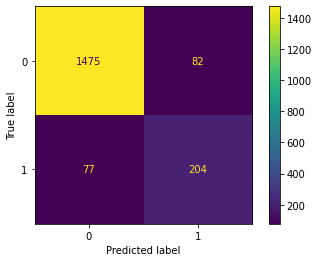

In [19]:
# With RandomizedSearchCV, 0.8366566327708409 for
# {'scale_pos_weight': 3, 'reg_lambda': 0, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.25}

predictions = clf_rnd.predict(X_test)
print(balanced_accuracy_score(y_test, predictions))

c_matrix = confusion_matrix(y_test, predictions, labels=clf_rnd.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix,
                              display_labels=clf_rnd.classes_)
disp.plot()
plt.show()